In [111]:
import pandas as pd
import numpy as np

## import data and general info 

In [112]:
data =   pd.read_csv('Mall_Customers.csv')

In [113]:
data.columns = [i.lower() for i in data.columns]

In [114]:
data.head(3)

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [115]:
data.describe()

,customerid,age,annual income (k$),spending score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual income (k$)      200 non-null    int64 
 4   spending score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## null values ,  duplicates and preparation

In [117]:
data.isnull().sum().sum()

0

In [118]:
data.duplicated().sum()

0

In [119]:
data.head(1)

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39


In [120]:
data.rename(columns={'annual income (k$)':'income','spending score (1-100)':'score'},inplace=True)

In [121]:
data.head(1)

,customerid,gender,age,income,score
0,1,Male,19,15,39


## lets see the distributions 

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 




data['sex'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)

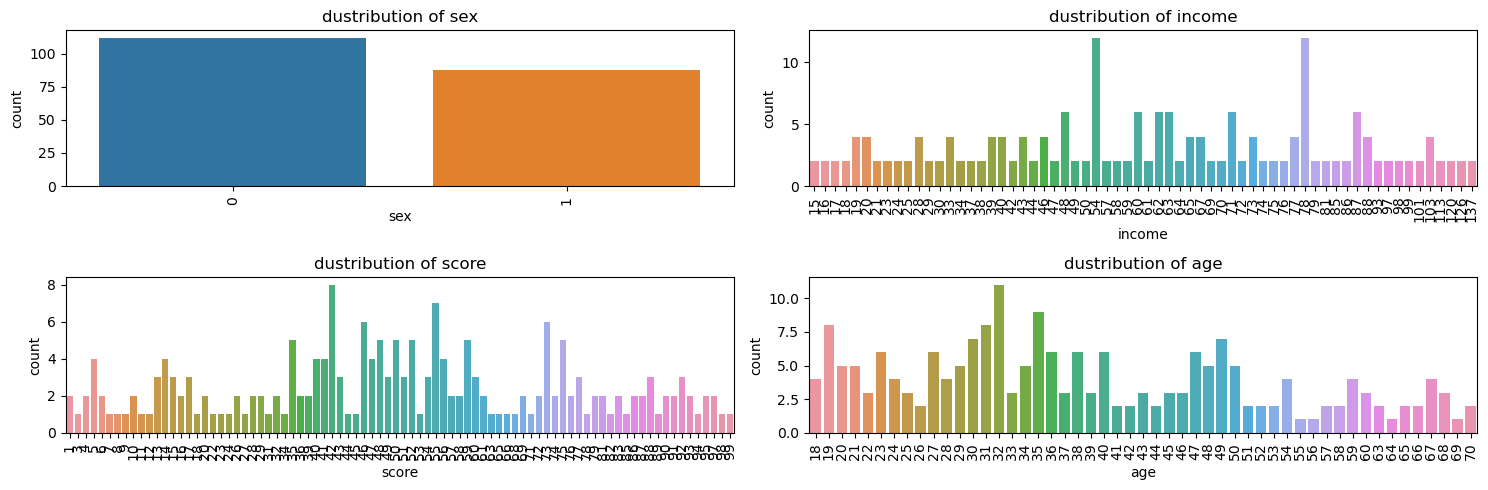

In [123]:
to_plot = ['sex','income','score','age']
plt.figure(figsize=(15,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.countplot(data[to_plot[i]])
    plt.title(f'dustribution of {to_plot[i]}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
        

## what we can see here is :

### we have more women clients
### score in normaly distributed
### we have more young than old customers 
### income is evenly distributed expect for some cases at 54000,78000

## wich factor affects more the spending score?

## gender :

In [124]:
gender_and_score = pd.crosstab(index=data['gender'],columns=data['score'])

### test of indipendence

In [125]:


import scipy.stats as stats

stats.chi2_contingency(gender_and_score,)

Chi2ContingencyResult(statistic=87.6922928262214, pvalue=0.34123996771002013, dof=83, expected_freq=array([[1.12, 0.56, 1.12, 2.24, 1.12, 0.56, 0.56, 0.56, 1.12, 0.56, 0.56,
        1.68, 2.24, 1.68, 1.12, 1.68, 0.56, 1.12, 0.56, 0.56, 0.56, 1.12,
        0.56, 1.12, 1.12, 0.56, 1.12, 0.56, 2.8 , 1.12, 1.12, 2.24, 2.24,
        4.48, 1.68, 0.56, 0.56, 3.36, 2.24, 2.8 , 1.68, 2.8 , 1.68, 2.8 ,
        0.56, 1.68, 3.92, 2.24, 1.12, 1.12, 2.8 , 1.68, 1.12, 0.56, 0.56,
        0.56, 0.56, 1.12, 0.56, 1.12, 3.36, 1.12, 2.8 , 1.12, 1.68, 0.56,
        1.12, 1.12, 0.56, 1.12, 0.56, 1.12, 1.12, 1.68, 0.56, 1.12, 1.12,
        1.68, 1.12, 0.56, 1.12, 1.12, 0.56, 0.56],
       [0.88, 0.44, 0.88, 1.76, 0.88, 0.44, 0.44, 0.44, 0.88, 0.44, 0.44,
        1.32, 1.76, 1.32, 0.88, 1.32, 0.44, 0.88, 0.44, 0.44, 0.44, 0.88,
        0.44, 0.88, 0.88, 0.44, 0.88, 0.44, 2.2 , 0.88, 0.88, 1.76, 1.76,
        3.52, 1.32, 0.44, 0.44, 2.64, 1.76, 2.2 , 1.32, 2.2 , 1.32, 2.2 ,
        0.44, 1.32, 3.08, 1.76, 0.8

### we got a p-value of 0.34 so we will consider that there is not a significant diference between  gender and score

### validate that with correlation 

In [126]:


cor,pval = stats.pearsonr(data['sex'],data['score'])
pval,cor

(0.4137446589852173, -0.0581087392616208)

### we got a correlation of |0.05| but with a p value of 0.41 so the previus results are correct 

## AGE

In [127]:
res = stats.ttest_ind(a= data['age'],
                b= data['score'],
                equal_var=False)

In [128]:
res

TtestResult(statistic=-5.467142466545633, pvalue=9.499173731690042e-08, df=306.27620746426413)

In [129]:
cor,pval = stats.pearsonr(data['age'],data['score'])
cor,pval

(-0.32722684603909, 2.2502957035653247e-06)

### age is a strong indicator of spending score !

## INCOME 

In [130]:
res = stats.ttest_ind(a= data['income'],
                b= data['score'],
                equal_var=False)

In [131]:
res

TtestResult(statistic=3.9777223489261595, pvalue=8.266434445052918e-05, df=397.88583137932727)

In [132]:
cor,pval = stats.pearsonr(data['income'],data['score'])
cor,pval

(0.009902848094037603, 0.889313437027399)

### income is very strong  indicator also , and we got a small correlation but p-value very high so we will not consider it 

## OUR TASK IS TO CATEGORIZE OUR CUSTOMERS SO:

In [133]:
#drop unusfull
data = data.drop(columns=['gender'])

### we will use the elbow method to find the optimal number of clusters 

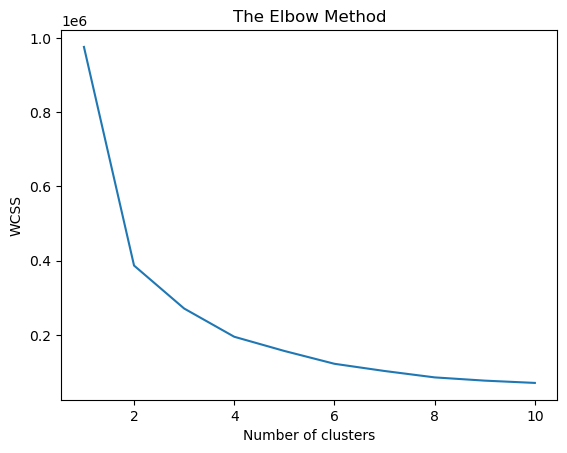

In [134]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### we will have 4 clusters 

In [144]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [145]:
data['class'] = y_kmeans


## visualize the results 

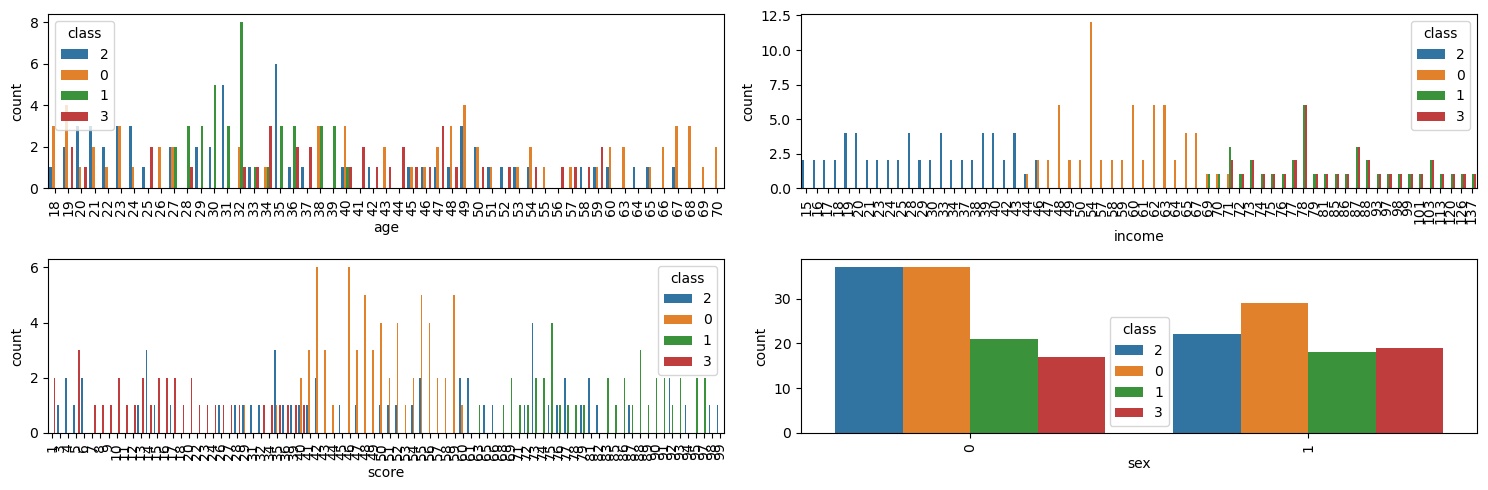

In [146]:
cols_t = data.drop(columns=['class','customerid']).columns

plt.figure(figsize=(15,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.countplot(data[cols_t[i]],hue=data['class'].astype('str'))
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
    

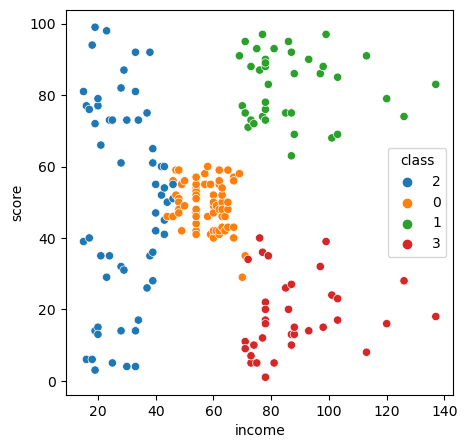

In [147]:

plt.figure(figsize=(5,5))
sns.scatterplot(data['income'],data['score'],hue=data['class'].astype('str'))
plt.show()
    

### class 0 : low-medioum income - low-medioum spending score
### class 1 : medium - high icome -high spending score 
### class 2 : low income 
### class 3: high income - low spending score 


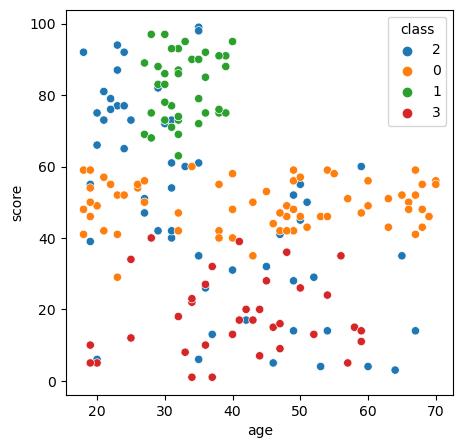

In [148]:
plt.figure(figsize=(5,5))
sns.scatterplot(data['age'],data['score'],hue=data['class'].astype('str'))
plt.show()

### class 0 : medioum score 
### class 1 : young age  -high spending score 
### class 2 : not much info 
### class 3: not much info  

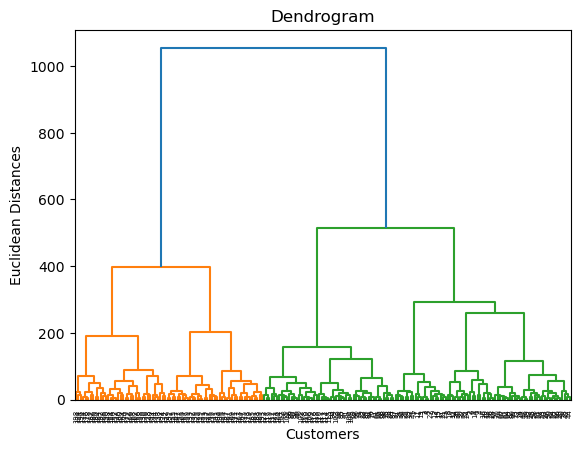

In [151]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data.drop(columns=['class']), method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

### validation of number of clusters = 4 

## these are the results of the customer segmentation with all the columns 
## we will try only with income 

In [155]:
data2 = data[['income','score']]

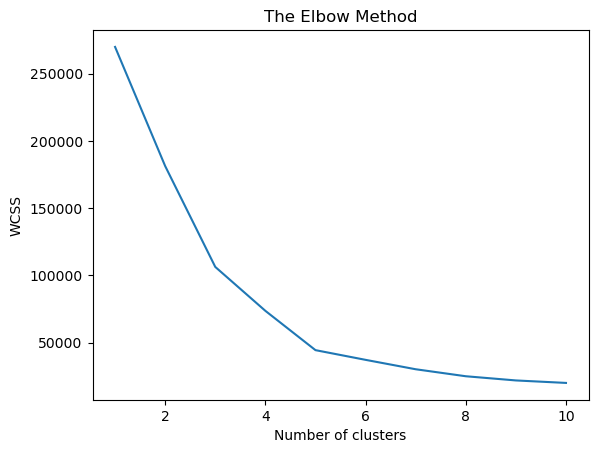

In [156]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [157]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2)

In [158]:
data2['class'] = y_kmeans

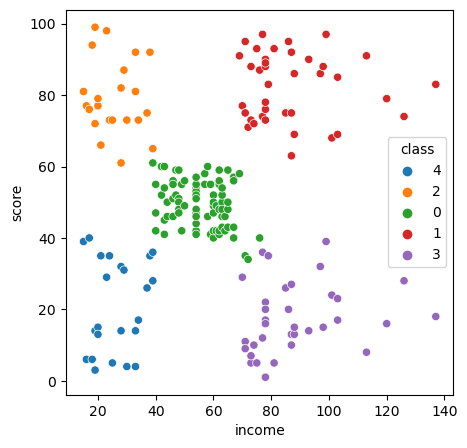

In [159]:
plt.figure(figsize=(5,5))
sns.scatterplot(data2['income'],data2['score'],hue=data2['class'].astype('str'))
plt.show()

## here we have :
### class 0 : medium spending score , medium-to-low-income
### class 1: high income , high spending score
### class 2: low income high spending score
### class 3: high income , low spending score
### class 4 : low income low spending score 

## we can see that with only icome the results are much better so we will save those only 

In [160]:
info = ['class 0 : medium spending score , medium-to-low-income',
'class 1: high income , high spending score',
'class 2: low income high spending score',
'class 3: high income , low spending score',
'class 4 : low income low spending score']



    
    
    
    
data2.to_csv('clustering_only_with_income.csv')

with open('details_about_clustering_with_income.txt','w') as f:
    for line in info:
        f.write(line)
    f.close()